## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
# Combine the data into a single dataset
study_data_df = pd.merge(study_results_df,mouse_metadata_df,how='left',on=['Mouse ID'])
# Display the data table for preview
study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# study_results_uniq_df = study_results_df.drop_duplicates(['Mouse ID','Timepoint'])


In [3]:
# Checking the number of mice.
len(study_data_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows 
# up for Mouse ID and Timepoint. 
duplicate_rows_index = study_data_df.duplicated(subset=['Mouse ID','Timepoint'])
# finding Mouse with duplicate Time point and ID "g989"
column_name = "Mouse ID"
duplicate_mouse_ids = study_data_df.loc[duplicate_rows_index,column_name].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_df.loc[study_data_df['Mouse ID']=='g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df = study_data_df.loc[study_data_df['Mouse ID']!='g989']
cleandata_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleandata_df['Mouse ID'].unique())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_tum_df = cleandata_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_mean = drug_tum_df.groupby('Drug Regimen').mean()
drug_median = drug_tum_df.groupby('Drug Regimen').median()
drug_var = drug_tum_df.groupby('Drug Regimen').var()
drug_std = drug_tum_df.groupby('Drug Regimen').std()
drug_sem = drug_tum_df.groupby('Drug Regimen').sem()

summary_df1 =  pd.merge(drug_mean,drug_median, how='left',on=['Drug Regimen']).merge(drug_var,on='Drug Regimen',how='left'
).merge(drug_std,on='Drug Regimen',how='left').merge(drug_sem,on='Drug Regimen', how='left')
# summary_df1 = summary_df1.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Mean'})
summary_df1.columns=['Volume Mean','Volume Median','Volume Variance','Volumne STD','Volume SEM']
summary_df1

,Volume Mean,Volume Median,Volume Variance,Volumne STD,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

regimen_df = cleandata_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
regimen_df.columns=['Volume Mean','Volume Median','Volumne Variance','Volume STD','Volume SEM']
regimen_df

,Volume Mean,Volume Median,Volumne Variance,Volume STD,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

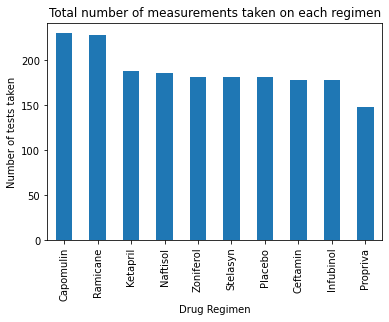

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = cleandata_df['Drug Regimen'].value_counts()
drug_count.plot(kind='bar')
plt.title('Total number of measurements taken on each regimen')
plt.ylabel('Number of tests taken')
plt.xlabel('Drug Regimen')

([<matplotlib.axis.XTick at 0x2b3a4f76748>,
 <a list of 10 Text major ticklabel objects>)

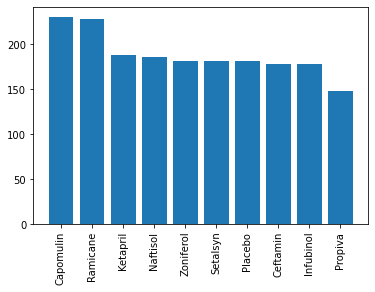

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_count = cleandata_df['Drug Regimen'].value_counts()
drugs = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Setalsyn','Placebo','Ceftamin','Infubinol','Propiva']
bar2 = plt.bar(drugs,drug_count,)
plt.xticks(drugs, rotation=90)



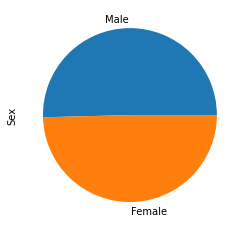

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice = cleandata_df.drop_duplicates(['Mouse ID'])
sex_mice = unique_mice['Sex'].value_counts()
sex_mice.plot(kind='pie')

([<matplotlib.patches.Wedge at 0x2b3a5065518>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')])

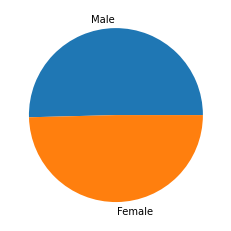

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# genderpie = merge2.groupby('Sex')['Sex'].agg(['count'])
# genderpie.plot(kind='pie',subplots=True)
gender =['Male','Female']
plt.pie(sex_mice,labels = gender)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
original_t = cleandata_df.drop_duplicates('Mouse ID',keep='first')
original_t = original_t.loc[original_t['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

last_timepoint = cleandata_df.drop_duplicates('Mouse ID',keep='last')

last_timepoint = last_timepoint.loc[last_timepoint['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# last_timepoint = pd.DataFrame(last_timepoint['Tumor Volume (mm3)'])
# last_timepoint.columns = ['Final Tumor Volume (mm3)']
original_t = original_t.sort_values(by='Mouse ID',ascending=True)
last_timepoint = last_timepoint.sort_values(by='Mouse ID',ascending=True)
# pd.merge(original_t,last_timepoint,left_index=True,right_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#study_data_df = pd.merge(study_results_df,mouse_metadata_df,how='left',on=['Mouse ID'])

first_last = pd.merge(original_t,last_timepoint,how='left',on=['Mouse ID'])
first_last = first_last[['Mouse ID','Timepoint_x','Tumor Volume (mm3)_x','Metastatic Sites_x','Sex_x','Age_months_x','Timepoint_y','Tumor Volume (mm3)_y']]
first_last.columns=['Mouse ID','First Timepoint','First Tumor Volume (mm3)','Metastatic Sites','Sex','Age Months','Last Timepoint','Last Tumor Volume (mm3)',]
first_last

,Mouse ID,First Timepoint,First Tumor Volume (mm3),Metastatic Sites,Sex,Age Months,Last Timepoint,Last Tumor Volume (mm3)
0,a203,0,45.0,0,Female,20,45,67.973419
1,a251,0,45.0,0,Female,21,45,65.525743
2,a275,0,45.0,0,Female,20,45,62.999356
3,a411,0,45.0,0,Male,3,45,38.407618
4,a444,0,45.0,0,Female,10,45,43.047543
5,a520,0,45.0,0,Male,13,45,38.810366
6,a577,0,45.0,0,Female,6,30,57.031862
7,a644,0,45.0,0,Female,7,45,32.978522
8,a685,0,45.0,0,Male,8,45,66.083066
9,b128,0,45.0,0,Female,9,45,38.982878


In [15]:

# Put treatments into a list for for loop (and later for plot labels
Regimen = []
Regimen.append(last_timepoint['Drug Regimen'])    
# Create empty list to fill with tumor vol data (for plotting)
Tumor = []
Tumor.append(last_timepoint['Tumor Volume (mm3)'])
Tumor
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = last_timepoint['Tumor Volume (mm3)'].quantile(0.25)
Q3 = last_timepoint['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
# outliers
low_outlier = Q1-(1.5*IQR)
high_outlier = Q3+(1.5*IQR)
outliers = (last_timepoint['Tumor Volume (mm3)']>high_outlier) 
print(high_outlier)
print(low_outlier)
last_timepoint

 # Q1 - (1.5 * IQR) Higher Outlier= Q3 + (1.5 * IQR) 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


94.04403868375002
3.0739668737499812


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1836,a444,45,43.047543,0,Ramicane,Female,10,25
1857,a520,45,38.810366,1,Ramicane,Male,13,21
1371,a577,30,57.031862,2,Infubinol,Female,6,25
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1794,a685,45,66.083066,3,Infubinol,Male,8,30
1764,b128,45,38.982878,2,Capomulin,Female,9,22


{'whiskers': [<matplotlib.lines.Line2D at 0x2b3a50bb7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x2b3a50bbeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b3a50bb4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x2b3a50c85f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b3a50c8978>],
 'means': []}

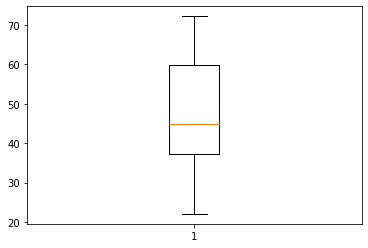

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(last_timepoint['Tumor Volume (mm3)'])

## Line and Scatter Plots

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
196,a275,0,45.000000,0,Ceftamin,Female,20,28
250,a275,5,46.795257,0,Ceftamin,Female,20,28
591,a275,10,47.371343,0,Ceftamin,Female,20,28
834,a275,15,49.734404,0,Ceftamin,Female,20,28
986,a275,20,50.513437,1,Ceftamin,Female,20,28
1139,a275,25,53.576064,1,Ceftamin,Female,20,28
1415,a275,30,54.444713,2,Ceftamin,Female,20,28
1602,a275,35,56.353538,2,Ceftamin,Female,20,28
1665,a275,40,60.921539,3,Ceftamin,Female,20,28
1856,a275,45,62.999356,3,Ceftamin,Female,20,28


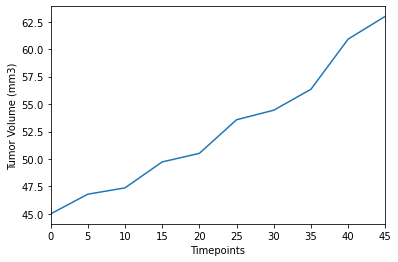

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = study_data_df.loc[study_data_df['Mouse ID'] =='a275']
plt.plot(cap_mouse['Timepoint'],cap_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,45)
cap_mouse

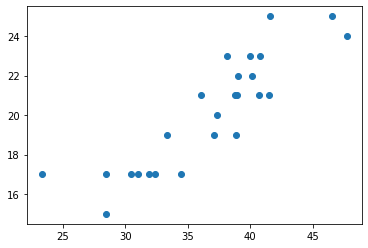

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_vw = last_timepoint.loc[last_timepoint['Drug Regimen'] =='Capomulin']
capo_tv = capomulin_vw['Tumor Volume (mm3)']
capo_wt = capomulin_vw['Weight (g)']
plt.scatter(capo_tv,capo_wt)

## Correlation and Regression

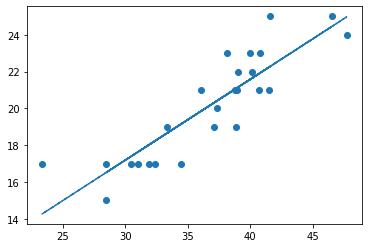

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.pearsonr(capo_wt,capo_tv)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(capo_tv, capo_wt)
vc_fit = vc_slope * capo_tv + vc_int
plt.scatter(capo_tv,capo_wt)
plt.plot(capo_tv,vc_fit,"--")
